In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [5]:

def cut_ignored_indices(n_stores, axs, comparison_text, ctx, inv):
    segments = []
    for index in range(4):
        begin_index = index * (1024 * 500)
        next_index = (index+1) * (1024 * 500)
        ignore_idx = 1024 * 300
        segments.append((begin_index + ignore_idx -1, next_index-1))

    ctx_data = np.concatenate([ctx[start:end] for start, end in segments])
    inv_data = np.concatenate([inv[start:end] for start, end in segments])
    indices = np.random.choice(inv_data.shape[0], size=1500, replace=False)

    filtered_inv = inv_data[indices]
    filtered_ctx = ctx_data[indices]
    axs.scatter(filtered_inv, filtered_ctx, s=5)
    axs.set_title(f'n_stores = {n_stores}, {comparison_text} vs Context')
    axs.set_xlabel(comparison_text)
    axs.set_ylabel('Context')

    X = filtered_inv
    Y = filtered_ctx
    X = X.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, Y)

    # Generate evenly spaced values between the min and max of X
    X_fit = np.linspace(filtered_inv.min(), filtered_inv.max(), 100).reshape(-1, 1)

    # Predict using the model for these values
    Y_fit = model.predict(X_fit)
    axs.plot(X_fit, Y_fit, color='red', linewidth=1, label='Regression line')

def draw_plot(n_stores):
    # mode = 'orders'
    # mode = 'totalinv'
    mode = 'eachinv'

    if mode == 'orders':
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        df = pd.read_csv(f'../ctxanalysis/{n_stores}.csv')
        cut_ignored_indices(n_stores, axs[0], "Stores Order", df['ctx'].values, df['store_order'].values)
        cut_ignored_indices(n_stores, axs[1], "Warehouse Order", df['ctx'].values, df['warehouse_order'].values)
    elif mode == 'totalinv':
        fig, axs = plt.subplots(1, 1, figsize=(6, 5))
        df = pd.read_csv(f'../ctxanalysis/{n_stores}.csv')
        cut_ignored_indices(n_stores, axs, "Total inventory", df['ctx'].values, df['inv'].values)
    elif mode == 'eachinv':
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        df = pd.read_csv(f'../ctxanalysis/{n_stores}.csv')
        cut_ignored_indices(n_stores, axs[0], "Stores Inventory", df['ctx'].values, df['store_inv'].values)
        cut_ignored_indices(n_stores, axs[1], "Warehouse Inventory", df['ctx'].values, df['warehouse_inv'].values)

    plt.tight_layout()
    plt.show()

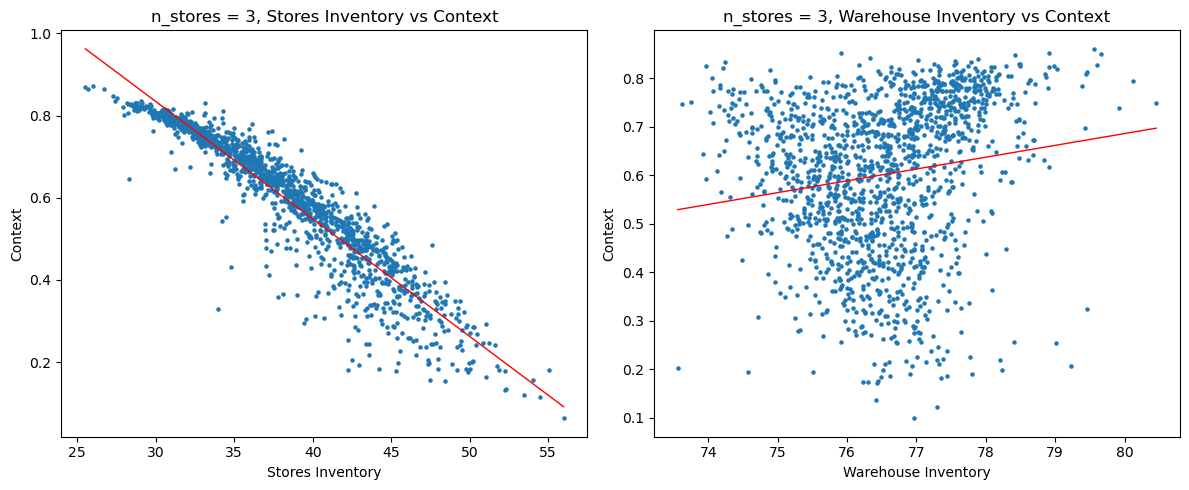

In [6]:
draw_plot(3)

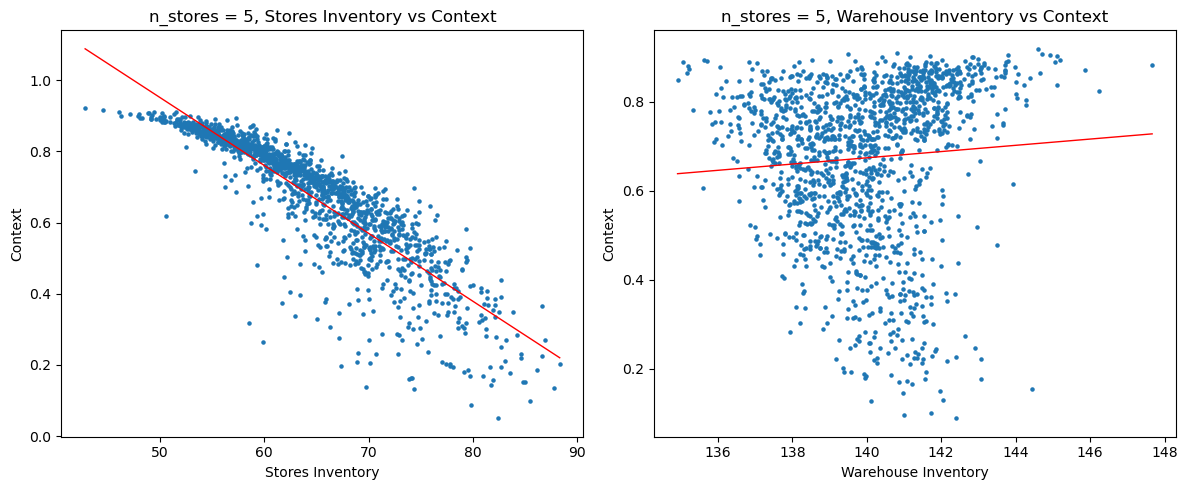

In [232]:
draw_plot(5)

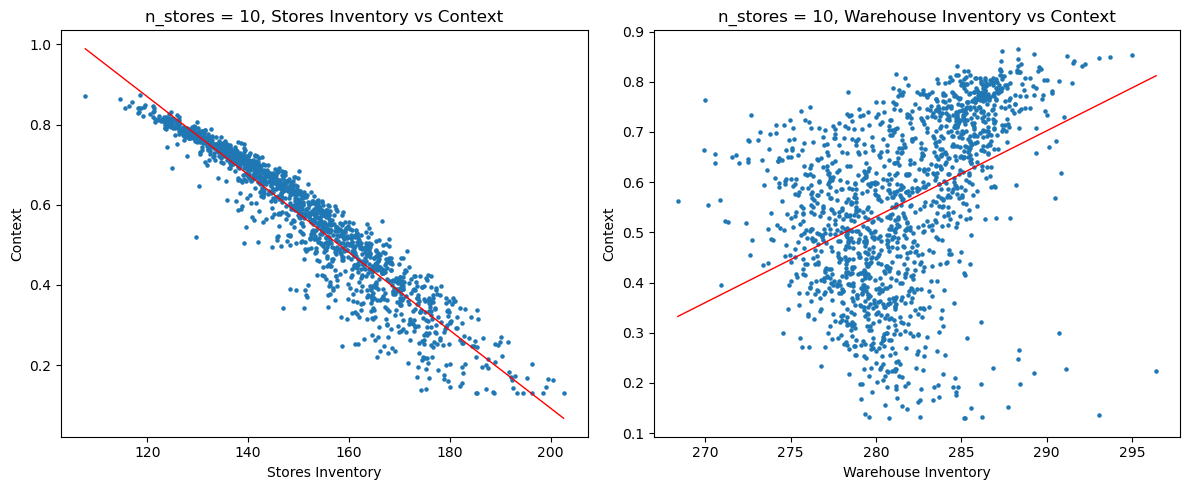

In [233]:
draw_plot(10)

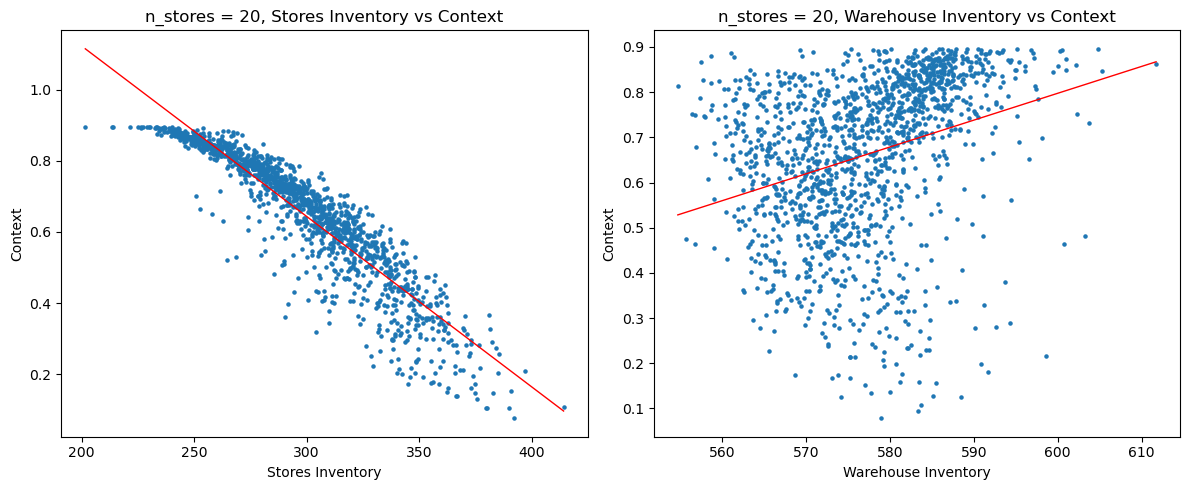

In [234]:
draw_plot(20)

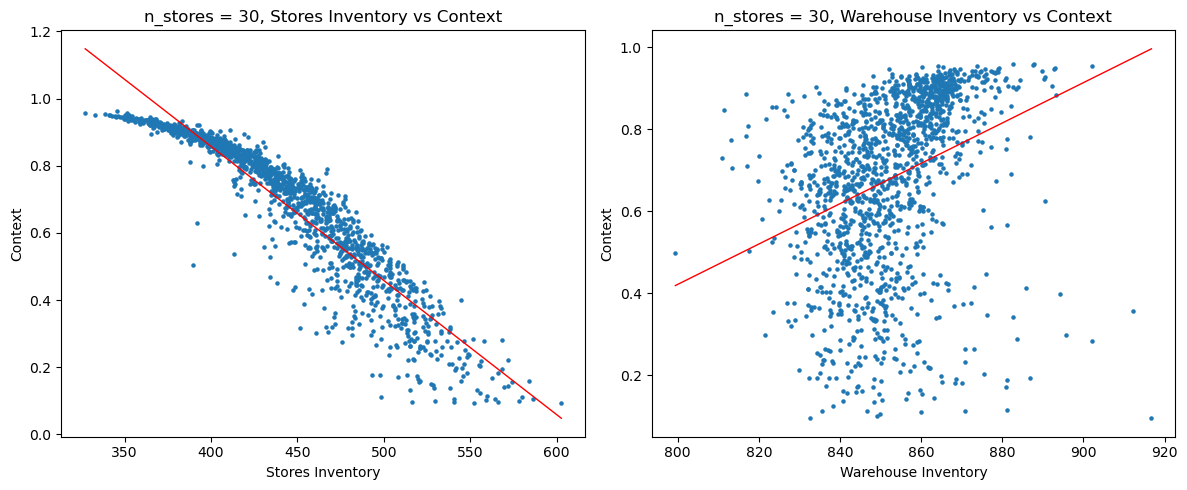

In [235]:
draw_plot(30)

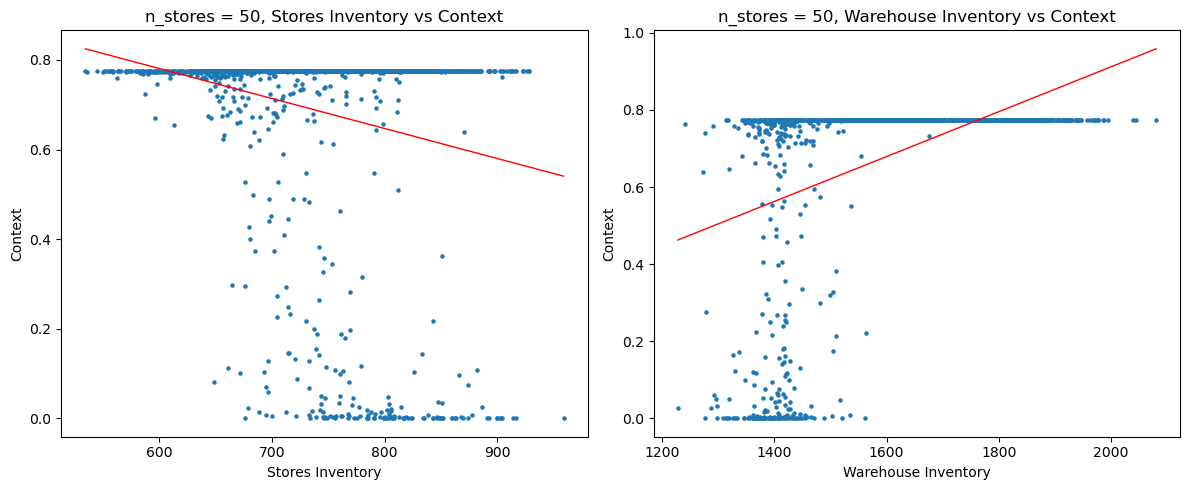

In [236]:
draw_plot(50)